In [1]:
import floatingPointSim as fps
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstats
from FixedPoint import FXfamily, FXnum

In [ ]:
A = np.random.rand(1000000)*2-1
plt.hist(A, 100)
plt.grid(True)

In [ ]:
rnd = np.vectorize(fps.roundToNearest)
B = rnd(A, 7)

In [ ]:
diff = B-A
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
x = np.linspace(min(diff), max(diff), 100)
result = plt.hist(diff, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(diff)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

In [ ]:
diff = (B-A)/abs(A)
plt.hist(diff, 100)
plt.grid(True)

In [ ]:
def toFixed(val, nbits, round=True):
    fam = FXfamily(nbits)
    if round:
        if (val > 0):
            val = val + 2.0**(-1-nbits)
        if (val < 0):
            val = val - 2.0**(-1-nbits)
    x = FXnum(val, fam)
    return float(x)
rndFxP = np.vectorize(toFixed)
C = rndFxP(A, 7, round=True)

In [ ]:
diff = C-A
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
result = plt.hist(diff, 100)
plt.grid(True)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

In [ ]:
diff = (C-A)/abs(A)
plt.hist(diff, 100)
plt.grid(True)

In [ ]:
gauss = np.random.normal(mean, stdev, len(A))
x = np.linspace(min(gauss), max(gauss), 100)
result = plt.hist(gauss, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(gauss)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)

In [ ]:
As = A * A
Bs = rnd(B * B, 7)
diff = Bs-As
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
x = np.linspace(min(diff), max(diff), 100)
result = plt.hist(diff, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(diff)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

In [ ]:
As = A * A * A
Bs = rnd(rnd(B * B, 7) * B, 7)
diff = Bs-As
mean = np.mean(diff)
stdev = np.sqrt(np.var(diff))
x = np.linspace(min(diff), max(diff), 100)
result = plt.hist(diff, 100)
plt.grid(True)
dx = result[1][1] - result[1][0]
scale = len(diff)*dx
plt.plot(x, spstats.norm.pdf(x, mean, stdev)*scale)
print("Mean:  {:.2E}".format(mean))
print("StDev: {:.2E}".format(stdev))

# Some serious statistics...

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.74947842, 0.75031653, 0.74949082, 0.74854362, 0.7504426 ,
        0.7492776 , 0.74869917, 0.74882376, 0.75087692, 0.74882626,
        1.        , 0.74882626, 0.75087692, 0.74882376, 0.74869917,
        0.7492776 , 0.7504426 , 0.74854362, 0.74949082, 0.75031653,
        0.74947842]),
 <matplotlib.lines.Line2D at 0x7ff678a7bd60>)

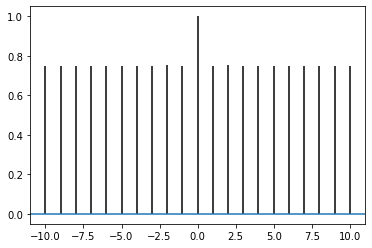

In [2]:
A = np.random.rand(100000)
#A = np.random.rand(100000)*2-1
plt.acorr(A)

In [ ]:
rnd = np.vectorize(fps.roundToNearest)
B = rnd(A, 5)
plt.acorr(B-A)

In [3]:
C = list(range(100000))
C[0] = A[0]
for i in range(1, 100000):
    C[i] = C[i-1] * A[i] + 0.5 * A[i]

In [4]:
D = list(range(100000))
D[0] = fps.roundToNearest(A[0],3)
for i in range(1, 100000):
    tmp1 = fps.roundToNearest(C[i-1], 3) * fps.roundToNearest(A[i], 3)
    tmp2 = 0.5 * fps.roundToNearest(A[i], 3)
    D[i] = fps.roundToNearest(tmp1 + tmp2, 3)

0.017380853729178747


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 2.50042686e-04,  4.21521511e-03, -2.81943282e-03,  5.14145620e-03,
        -9.51100619e-04,  4.93030429e-03, -2.17496948e-03, -3.42673965e-05,
         7.94979674e-03,  2.50909391e-02,  1.00000000e+00,  2.50909391e-02,
         7.94979674e-03, -3.42673965e-05, -2.17496948e-03,  4.93030429e-03,
        -9.51100619e-04,  5.14145620e-03, -2.81943282e-03,  4.21521511e-03,
         2.50042686e-04]),
 <matplotlib.lines.Line2D at 0x7ff6769d79d0>)

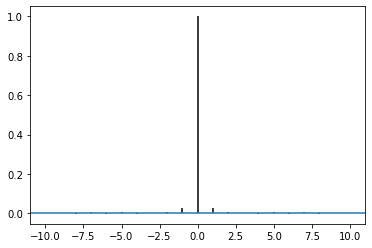

In [5]:
err = np.array(D)-np.array(C)
print(err[100000-1])
plt.acorr(err)

In [6]:
def toFixedToEven(val, nbits):
    if (val < 0):
        absval = -val
    else:
        absval = val
    fam = FXfamily(nbits)
    x1 = FXnum(absval, fam)
    x2 = FXnum(absval + 2.0**(-1-nbits), fam)
    if (abs(float(x1)-absval) < abs(float(x2)-absval)):
        x = x1
    elif (abs(float(x1)-absval) > abs(float(x2)-absval)):
        x = x2
    else:
        fam2 = FXfamily(nbits+1)
        lastbit = FXnum(absval, fam2).toBinaryString()[-2]
        if (lastbit == '0'):
            x = FXnum(absval, fam)
        else:
            x = FXnum(absval + 2.0**(-1-nbits), fam)
    if (val < 0):
        x = -x
    return float(x)

In [7]:
E = list(range(100000))
E[0] = toFixedToEven(A[0],3)
for i in range(1, 100000):
    tmp1 = toFixedToEven(C[i-1], 3) * toFixedToEven(A[i], 3)
    tmp2 = 0.5 * toFixedToEven(A[i], 3)
    E[i] = toFixedToEven(tmp1 + tmp2, 3)

-0.04511914627082125


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-4.47477673e-04, -1.63545192e-03, -1.63060416e-03, -4.86501419e-03,
         2.34022820e-03,  8.04576057e-04, -2.54471313e-03, -2.07858483e-03,
         7.38147378e-04,  1.17305454e-02,  1.00000000e+00,  1.17305454e-02,
         7.38147378e-04, -2.07858483e-03, -2.54471313e-03,  8.04576057e-04,
         2.34022820e-03, -4.86501419e-03, -1.63060416e-03, -1.63545192e-03,
        -4.47477673e-04]),
 <matplotlib.lines.Line2D at 0x7ff6764db100>)

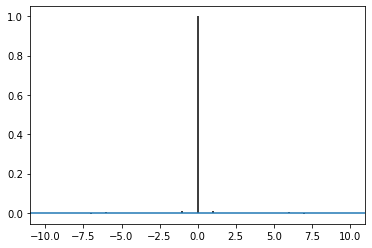

In [8]:
err = np.array(E)-np.array(C)
print(err[100000-1])
plt.acorr(err)

In [23]:
import math
F = A * math.e

In [24]:
G = list(range(100000))
G[0] = F[0]
for i in range(1, 100000):
    G[i] = G[i-1] * F[i]

In [26]:
H = list(range(100000))
H[0] = fps.roundToNearest(F[0],3)
for i in range(1, 100000):
    tmp1 = fps.roundToNearest(H[i-1], 3) * fps.roundToNearest(F[i], 3)
    H[i] = fps.roundToNearest(tmp1, 3)

-4.551152610304151e-57


(array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
          43,   44,   45,   46,   47, 

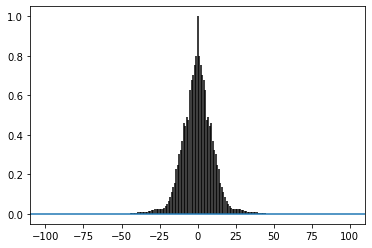

In [31]:
err = np.array(H)-np.array(G)
print(err[100000-1])
plt.acorr(err, maxlags=100)

In [28]:
I = A*A + A*A

In [29]:
rnd = np.vectorize(fps.roundToNearest)
J = rnd(rnd(A, 3) * rnd(A, 3) + rnd(A, 3) * rnd(A, 3), 3)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 6.72169463e-03, -4.46434628e-03, -8.32051727e-04,  2.64743114e-03,
        -2.25663102e-03,  4.66035605e-03,  3.11949526e-03, -2.54538091e-03,
         4.60554091e-03, -3.28786663e-04,  1.00000000e+00, -3.28786663e-04,
         4.60554091e-03, -2.54538091e-03,  3.11949526e-03,  4.66035605e-03,
        -2.25663102e-03,  2.64743114e-03, -8.32051727e-04, -4.46434628e-03,
         6.72169463e-03]),
 <matplotlib.lines.Line2D at 0x7ff67516d700>)

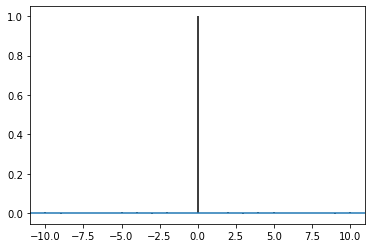

In [33]:
err = J-I
plt.acorr(err)

(array([ 1152.,  3488.,  6398.,  9751., 47903., 17186.,  7218.,  4109.,
         1875.,   920.]),
 array([-0.14257579, -0.11288874, -0.08320168, -0.05351463, -0.02382757,
         0.00585948,  0.03554654,  0.06523359,  0.09492065,  0.1246077 ,
         0.15429475]),
 <a list of 10 Patch objects>)

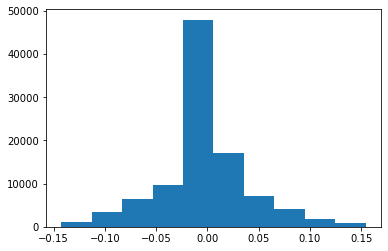

In [34]:
plt.hist(err)